In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.5+ KB


In [5]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


Renaming listed_in as category

In [6]:
df.rename(columns={'listed_in':'category'},inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Creating pie for the type

In [9]:
df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

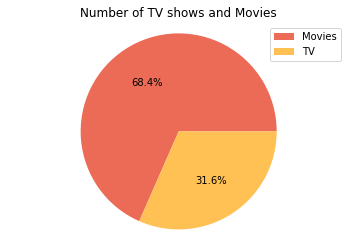

In [10]:
val=['4265','1969']
l=['Movies','TV']
plt.pie(val,autopct='%1.1f%%',colors=['#EC6B56','#FFC154'])
plt.title("Number of TV shows and Movies")
plt.legend(l)
plt.axis('equal')
plt.show()

## Preprocessing

Remove null values

In [11]:
df.dropna(how='any', inplace=True)

In [12]:
df.shape

(3774, 12)

Converting into a single country name

In [13]:
c=0
l=[]
for i in df['country']:
    k=str(i).split(',')
    l.append(k[0])
x = pd.Series(l) 
df['country']=x
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...",United States,"September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...",France,"September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,United States,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...",United States,"September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


Converting into a single category

In [14]:
c=0
l=[]
for i in df['category']:
    k=str(i).split(',')
    l.append(k[0])
x = pd.Series(l) 
df['category']=x
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...",United States,"September 9, 2019",2019,TV-PG,90 min,Children & Family Movies,Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Action & Adventure,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...",France,"September 8, 2017",2014,R,110 min,Cult Movies,"In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,United States,"September 8, 2017",2017,TV-MA,60 min,Comedies,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...",United States,"September 8, 2017",2014,R,90 min,Horror Movies,A struggling couple can't believe their luck w...


Number of movies per category

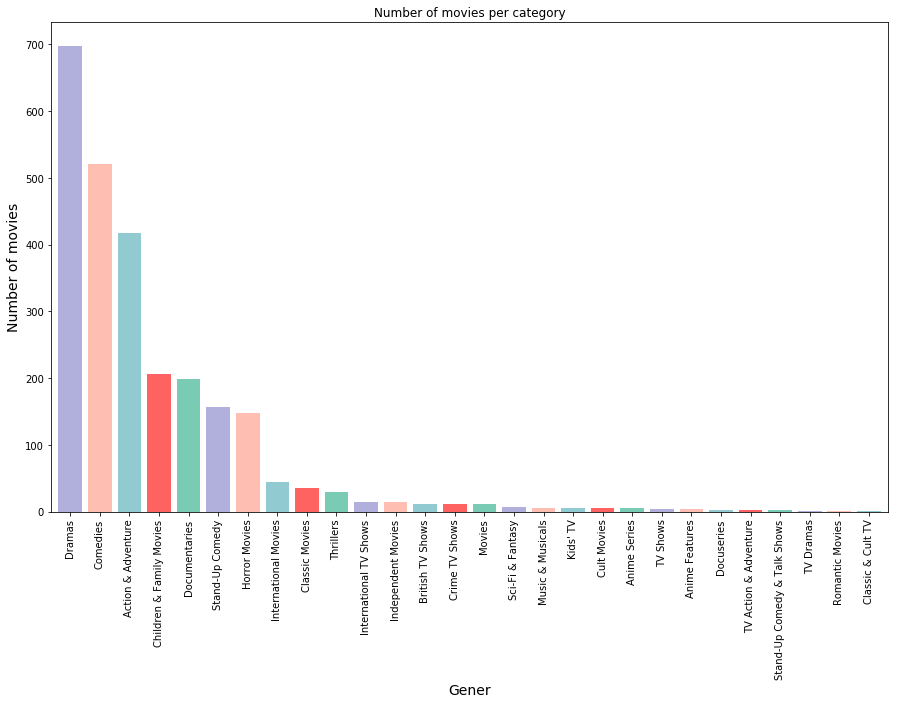

In [15]:
df['category'].value_counts().plot(
    kind='bar',color=['#b1afdb','#ffbeb2','#92cad1','#ff6361','#79ccb3'],
    figsize=(15,9),width=0.8)
plt.title("Number of movies per category")
plt.xlabel("Gener", fontsize=14)
plt.ylabel("Number of movies",fontsize=14)
plt.show()

Number of movies per country

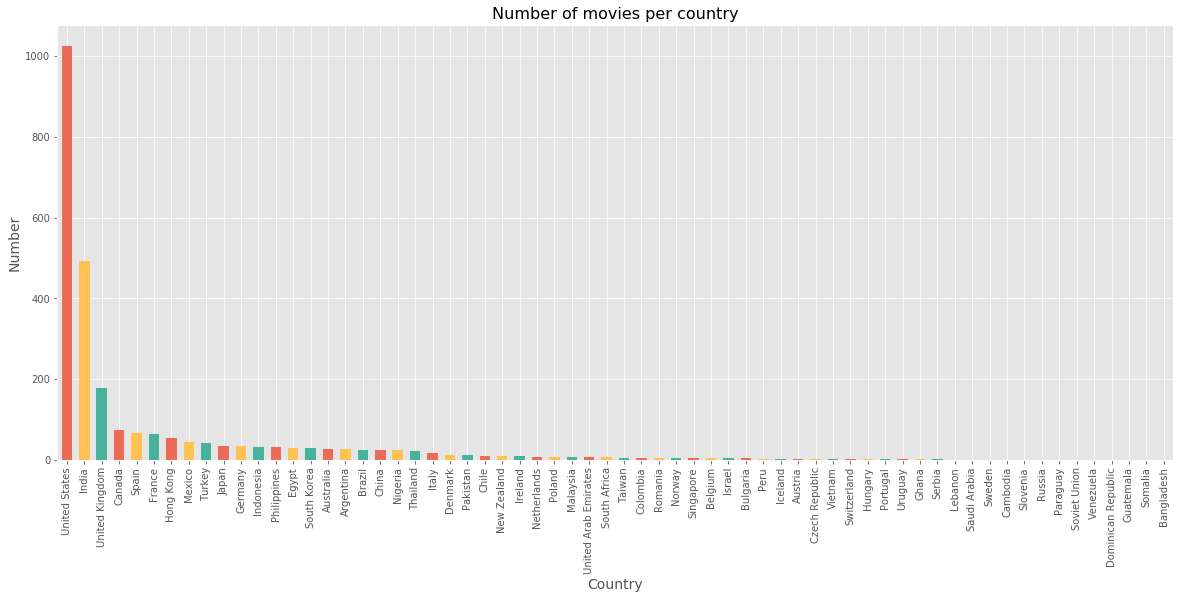

In [16]:
import matplotlib as mpl
mpl.style.use(['ggplot'])
df['country'].value_counts().plot(kind='bar',figsize=(20, 8),width=0.6,
         color=['#EC6B56','#FFC154','#47B39C'])
plt.title("Number of movies per country",fontsize=16)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Number",fontsize=14)
plt.show()

Converting duration into int

In [17]:
m=df['duration']
l=[]
for i in m:
    l.append(int(i.split(' ')[0]))
x = pd.Series(l) 
df['duration']=x

Plotting Data

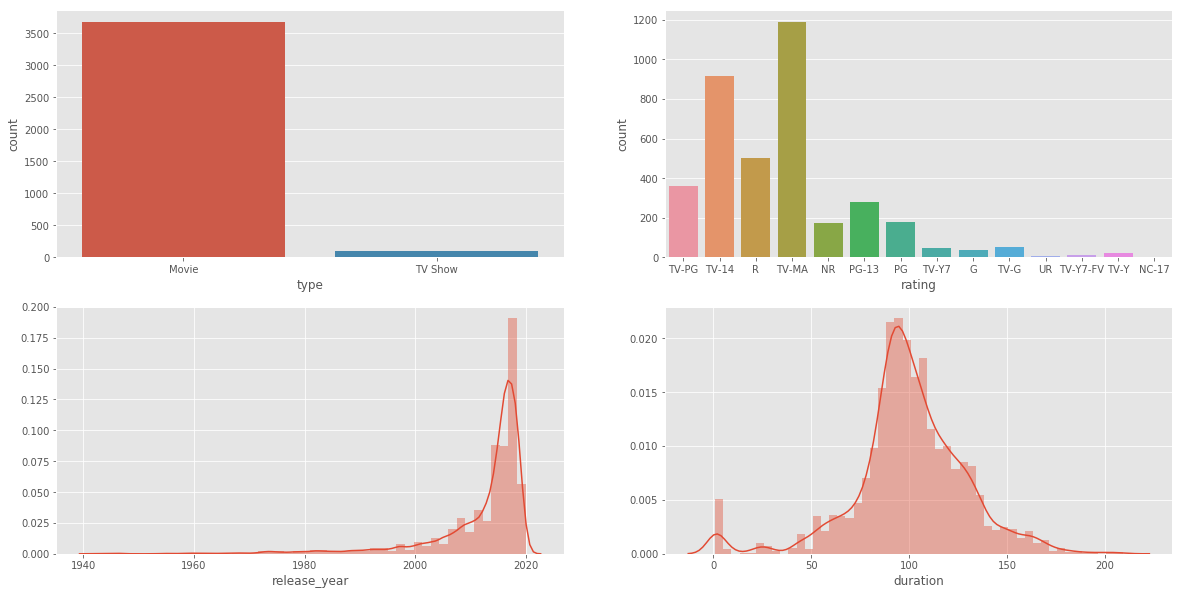

In [67]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot('type',data=df,ax=axes[0,0])
sns.countplot('rating',data=df,ax=axes[0,1])
sns.distplot(df['release_year'], kde=True,ax=axes[1,0])
sns.distplot(df['duration'].dropna(), kde=True,ax=axes[1,1])
plt.show()

Comparing duration of movies per category

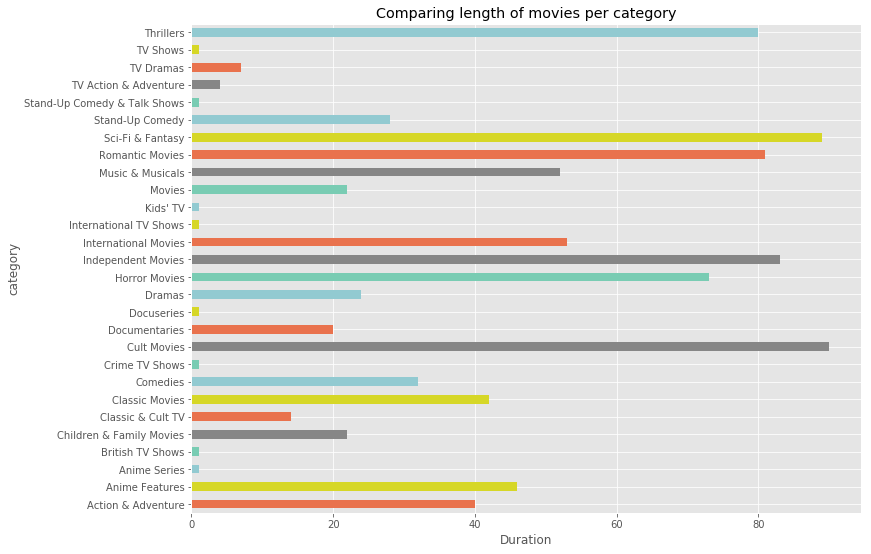

In [19]:
df.groupby('category')['duration'].min().plot(kind='barh',figsize=(12,9),
                                              color=['#e9724d','#d6d727','#92cad1','#79ccb3','#868686'])
plt.title("Comparing length of movies per category")
plt.xlabel("Duration")
plt.show()

## TV Show Analysis

In [20]:
dftv=df[df['type']=='TV Show']
dftv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
161,81000389,TV Show,The Hockey Girls,"Kiko Cruz Claverol, Patricia Font","Iria del Río, Nora Navas, Josep Linuesa, Natàl...",Netherlands,"September 20, 2019",2019,TV-MA,123.0,Dramas,The passionate members of a girls' roller hock...
247,80202129,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",Pakistan,"September 15, 2017",2016,TV-MA,93.0,Dramas,Twenty years after 5-year-old Jesse disappears...
333,81004113,TV Show,Age of Rebellion,Peter Ho,"Peter Ho, Jeanine Yang, Tammy Chen, Jason Tsou...",Singapore,"September 1, 2018",2018,TV-MA,92.0,Horror Movies,"At their high school, a group of unruly teens ..."
466,80203920,TV Show,Nowhere Man,DJ Chen,"Alyssa Chia, Mavis Fan, Joseph Chang, Wang Po-...",United States,"October 31, 2019",2019,TV-MA,123.0,Dramas,Two nefarious schemes taking place 10 years ap...
474,81166978,TV Show,"Bring It On, Ghost",Park Joon-hwa,"Taecyeon, Kim So-hyun, Kwon Yul, Kim Sang-ho, ...",United States,"October 30, 2019",2016,TV-14,110.0,Cult Movies,A college student with psychic abilities takes...


In [21]:
dftv.shape

(96, 12)

In [22]:
dftv['release_year'].value_counts()

2019    20
2018    19
2017    16
2016    10
2015     9
2014     7
2012     4
2013     2
2011     2
2006     2
2020     1
2010     1
2008     1
2001     1
1990     1
Name: release_year, dtype: int64

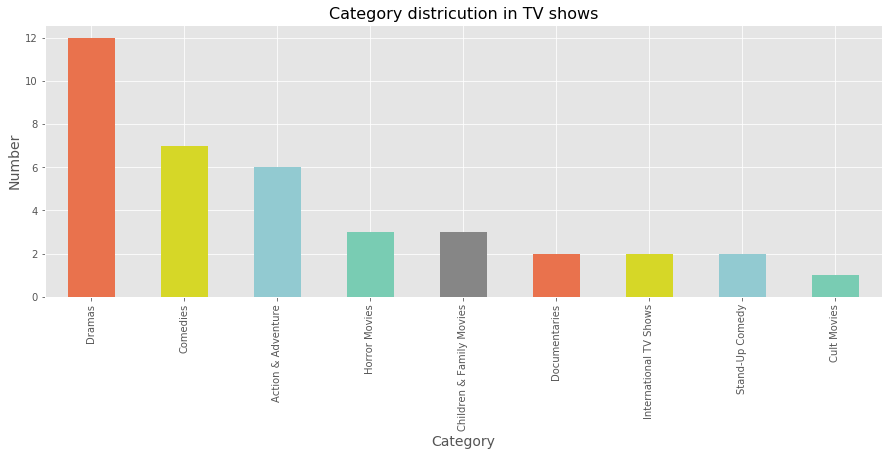

In [55]:
dftv['category'].value_counts().plot(
    kind='bar',figsize=(15,5)
    ,color=['#e9724d','#d6d727','#92cad1','#79ccb3','#868686'])
plt.title("Category districution in TV shows",fontsize=16)
plt.xlabel("Category",fontsize=14)
plt.ylabel("Number",fontsize=14)
plt.show()

In [61]:
df.category.value_counts().head(5) #most number of tv shows category

Dramas                      698
Comedies                    521
Action & Adventure          418
Children & Family Movies    206
Documentaries               199
Name: category, dtype: int64

## Movie Analysis

In [62]:
dfm=df[df['type']=='Movie']
dfm.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...",United States,"September 9, 2019",2019,TV-PG,90.0,Children & Family Movies,Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,90.0,Action & Adventure,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...",France,"September 8, 2017",2014,R,135.0,Cult Movies,"In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,United States,"September 8, 2017",2017,TV-MA,98.0,Comedies,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...",United States,"September 8, 2017",2014,R,113.0,Horror Movies,A struggling couple can't believe their luck w...


In [63]:
dfm.shape

(3678, 12)

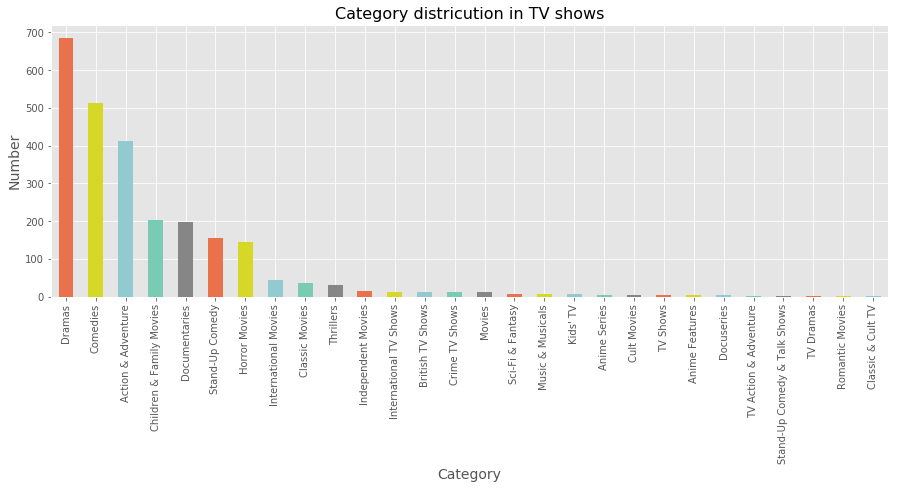

In [64]:
dfm['category'].value_counts().plot(
    kind='bar',figsize=(15,5)
    ,color=['#e9724d','#d6d727','#92cad1','#79ccb3','#868686'])
plt.title("Category districution in TV shows",fontsize=16)
plt.xlabel("Category",fontsize=14)
plt.ylabel("Number",fontsize=14)
plt.show()

In [65]:
dfm.category.value_counts().head(5) #most number of movie categories

Dramas                      686
Comedies                    514
Action & Adventure          412
Children & Family Movies    203
Documentaries               197
Name: category, dtype: int64